###Note: 
The data loaded in below was stored locally and is not in the GitHub repo in order to keep the size of the repo down. The json files created are relatively small and are in the same folder as this notebook.

In [1]:
# Libraries.
import matplotlib, matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# Setup.
% matplotlib inline

# Paths.
path_data = '../../../data/gatecount_%d/'

In [5]:
gate_1315=pd.read_csv('../../../data/gatecounts_edit_1315.csv')
gate_1315.head()

,Unnamed: 0,locationid,entries,servicedate,servicetime_fraction,weekday,month
0,0,1002,0,2013-01-01 00:00:00,3.00,1,1
1,1,1002,1,2013-01-01 00:00:00,5.00,1,1
2,2,1002,2,2013-01-01 00:00:00,5.25,1,1
3,3,1002,3,2013-01-01 00:00:00,5.50,1,1
4,4,1002,6,2013-01-01 00:00:00,5.75,1,1


In [6]:
mbta_daily=pd.read_csv('../../../data/mbta_daily.csv')
mbta_daily.head()

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1130: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,locationid,service_day,entries,name,line_1,line_2,lat,lon,service_datetime,fog,...,entries_weeks_ago_1,entries_weeks_ago_2,entries_weeks_ago_3,rain_predict,rain_fall_predict,snow_predict,snow_fall_predict,snow_accum,snow_accum_predict,dist_to_center
0,1002,2013-01-01 00:00:00,1892,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-01 03:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
1,1002,2013-01-02 00:00:00,5134,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-02 04:45:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
2,1002,2013-01-03 00:00:00,5733,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-03 05:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
3,1002,2013-01-04 00:00:00,6125,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-04 05:00:00,0,...,NaN,NaN,NaN,0,0,0,0,0,0,3.404767
4,1002,2013-01-05 00:00:00,3410,Andrew Square,Red,NaN,42.32955,-71.05696,2013-01-05 04:15:00,0,...,NaN,NaN,NaN,0,0,1,0,0,0,3.404767


In [7]:
mbta_daily['month']=map(month_col,mbta_daily['service_day'].values)

mbta_daily=mbta_daily[['locationid','service_day','snow','snow_fall']]
mbta_daily.head()

,locationid,service_day,snow,snow_fall
0,1002,2013-01-01 00:00:00,0,0
1,1002,2013-01-02 00:00:00,0,0
2,1002,2013-01-03 00:00:00,0,0
3,1002,2013-01-04 00:00:00,0,0
4,1002,2013-01-05 00:00:00,0,0


In [8]:
snow_daily=mbta_daily.groupby('service_day').agg(np.mean).reset_index()
snow_daily=snow_daily[['service_day','snow','snow_fall']]
snow_daily.head()

,service_day,snow,snow_fall
0,2013-01-01 00:00:00,0,0
1,2013-01-02 00:00:00,0,0
2,2013-01-03 00:00:00,0,0
3,2013-01-04 00:00:00,0,0
4,2013-01-05 00:00:00,0,0


##Determining snow bins

It's difficult to create equal-length bins, especially when approximately 75% of snowfall is 0-2 inches. The rest of the bins are as close to equally sized as possible.

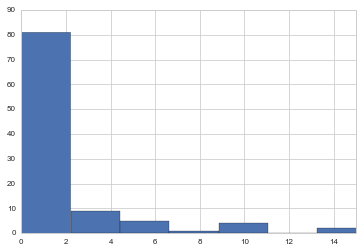

Snow days  104
Trace snow:  37
0-2 in snow:  44
2-4 in snow:  9
4-8 in snow:  6
8-15 in snow:  6
+15 in snow:  2


In [74]:
days_with_snow=snow_daily[snow_daily['snow']==1]


plt.hist(days_with_snow['snow_fall'].values,bins=10)
plt.xlim([0,15])
plt.show()


print 'Snow days ',len(days_with_snow)
print 'Trace snow: ',len(days_with_snow[days_with_snow['snow_fall']==0])
print '0-2 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>0)&(days_with_snow['snow_fall']<=2)])
print '2-4 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>2)&(days_with_snow['snow_fall']<=4)])
print '4-8 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>4)&(days_with_snow['snow_fall']<=8)])
print '8-15 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>8)&(days_with_snow['snow_fall']<=15)])
print '+15 in snow: ',len(days_with_snow[(days_with_snow['snow_fall']>15)])



In [11]:
station_info=pd.read_csv('../../../data/Stations_clean.csv')
station_latlong=pd.read_csv('../../../data/stations_latlong.csv')
station_latlong=station_latlong[['stationid','lat','lon']]

station_latlong.head()

,stationid,lat,lon
0,1002,42.329550,-71.056960
1,1004,42.321438,-71.052393
2,1005,42.274816,-71.029176
3,1006,42.265615,-71.019402
4,1007,42.250879,-71.004798


In [12]:
station_info=station_info.merge(station_latlong,on='stationid')
station_info.head()

,Unnamed: 0,stationid,name,line_temp,grouping,dist_to_center,lat,lon
0,0,1002,Andrew Square,Red,2,3.404767,42.329550,-71.056960
1,1,1004,JFK/U Mass,Red,0,4.328881,42.321438,-71.052393
2,2,1005,North Quincy,Red,1,9.777437,42.274816,-71.029176
3,3,1006,Wollaston,Red,1,10.976943,42.265615,-71.019402
4,4,1007,Quincy Center,Red,1,12.909591,42.250879,-71.004798


In [393]:
'''
station_id: station id of interest
bins: a list of tuples except for the first and last elements which are singletons. Used for identifying snowfall levels
    For example, bins=[ (0), (0,2), (2,4)..., (15)  ]
    
'''

def subset(station_id,bins,begin_time=5.25,end_time=24):
    
    res={}
    
    #get subset of station
    station_records=gate_1315[gate_1315['locationid']==station_id]
    
    #want to subset the dataframe to only include months in which there may be snow
    # don't want the seasonal trends of Summer, Spring, early Fall to skew my values for when there 
    # is no snow
    station_records=station_records[(station_records['month']>=10) |(station_records['month']<=3)]
    station_records=station_records[station_records['weekday']<5]
    station_records=station_records[(station_records['servicetime_fraction']<=end_time) & (station_records['servicetime_fraction']>=begin_time) ]
    
    # Now merge in the weather data
    station_records=station_records.merge(snow_daily,left_on='servicedate',right_on='service_day')
    #return station_records

    #get subset of snow records
    no_snow=station_records[station_records['snow']==False]
    #print mean_ridership
    
    snow=station_records[station_records['snow']==True]  
    no_snow_mean=no_snow[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    
    res['station_id']=1.*station_id
    res['station_name']= station_info[station_info['stationid']==station_id]['name'].values[0]
    res['coords']= [station_info[station_info['stationid']==station_id]['lat'].values[0],station_info[station_info['stationid']==station_id]['lon'].values[0]]
    
    res['time_intervals']=list(no_snow_mean.index.values)

    #print len(res['time_intervals'])
    res['mean_ent']=list(no_snow_mean['entries'].values)
    res['aggr_ent']=np.sum(list(no_snow_mean['entries'].values))

    
    # create time series for various snow bins
    res['mean_ent_snow']={}
    res['aggr_ent_snow']={}
    
    # create time series for the first, singleton element in bins
    snow_subset=snow[snow['snow_fall']==bins[0]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['mean_ent_snow'][str(bins[0])]=list(1.*snow_subset['entries'].values)
    res['aggr_ent_snow'][str(bins[0])]=np.sum(list((1.*snow_subset['entries']).values))
    
    for i in range(1,len(bins)-1):
        snow_subset=snow[(snow['snow_fall']>bins[i][0])&(snow['snow_fall']<=bins[i][1])]
        snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
        #print len(snow_subset)
        res['mean_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=list(1.*snow_subset['entries'].values)
        res['aggr_ent_snow'][str(bins[i][0])+'_'+str(bins[i][1])]=np.sum(list(1.*snow_subset['entries'].values))

        
    # create time series for the last, singleton element in bins
    snow_subset=snow[snow['snow_fall']>=bins[-1]]
    snow_subset=snow_subset[['entries','servicetime_fraction']].groupby(['servicetime_fraction']).agg(np.mean)
    #print len(snow_subset)
    res['mean_ent_snow'][str(bins[(-1)])]=list(1.*snow_subset['entries'].values)
    res['aggr_ent_snow'][str(bins[(-1)])]=np.sum(list(1.*snow_subset['entries'].values))

        
    
    return res
    


In [389]:
t=subset(1009,bins=[ (0), (0,2),(4,8),(8,15),(15)] ,begin_time=5.25,end_time=24)



In [153]:
import json

### Preparing master list containing series for each station

Note: station_id is stored as a float due to serializable issues in json.dump

In [394]:

master_list=list([])

station_ids=list(station_info['stationid'].unique())
bins_=[ (0), (0,2),(4,8),(8,15),(15)]

## keys in master dict have to be strings in order to be compatible with json.dump()
for station in station_ids:
    master_list.append(subset(station,bins= bins_ ,begin_time=5.25,end_time=24))
    
print len(master_list)
    

61


In [395]:
# write actual json file
filename='station_series.json'

with open(filename, 'w') as outfile:
    json.dump(master_list, outfile)

In [397]:
with open(filename) as data_file:    
    data = json.load(data_file)
    
data[0]['station_id']

1002.0

## Write shorter, summary json file 

This json file will be the same as the above one except the series 'mean_ent_snow','mean_ent', and 'time_intervals' will be removed. Wanted to have both available just in case

In [398]:

summary_list=list([])

station_ids=list(station_info['stationid'].unique())
bins_=[ (0), (0,2),(4,8),(8,15),(15)]
remove=['mean_ent_snow','mean_ent','time_intervals']

## keys in master dict have to be strings in order to be compatible with json.dump()
for station in station_ids:
    t=subset(station,bins= bins_ ,begin_time=5.25,end_time=24)
    
    for key in remove:
        t.pop(key,None)
        
    summary_list.append(t)
    
print len(summary_list)
    

61


In [399]:
# write actual json file
filename='station_summary.json'

with open(filename, 'w') as outfile:
    json.dump(summary_list, outfile)

In [400]:
with open(filename) as data_file:    
    data = json.load(data_file)
    
data[0]

{u'aggr_ent': 6010.281460552052,
 u'aggr_ent_snow': {u'0': 6025.081196581196,
  u'0_2': 5606.535349388798,
  u'15': 3153.0,
  u'4_8': 4524.666666666666,
  u'8_15': 3771.4833333333336},
 u'coords': [42.32955, -71.05696],
 u'station_id': 1002.0,
 u'station_name': u'Andrew Square'}